In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import shutil
from sklearn.model_selection import train_test_split
import random

In [2]:
# Define Paths
base_dir = 'data'

happy_dir = os.path.join(base_dir, 'Happy')
sad_dir = os.path.join(base_dir, "Sad")
angry_dir = os.path.join(base_dir, "Angry")

# Combine all image paths into a single list
image_files = []
for directory in [happy_dir, sad_dir, angry_dir]:
    image_files.extend([os.path.join(directory, f) 
    for f in os.listdir(directory) if f.endswith(('.jpg', '.png'))])

# Print the list of image files to verify
print(image_files)

['data\\Happy\\05-12-21-happy-people.jpg', 'data\\Happy\\10-Habits-of-Happy-People-Seniors-Today.jpg', 'data\\Happy\\170404-happy-workers-feature.jpg', 'data\\Happy\\1920px-face-smile.svg_.png.jpg', 'data\\Happy\\1HEoLBLidT2u4mhJ0oiDgig.png', 'data\\Happy\\1_617fd1e2590c2.jpg', 'data\\Happy\\220px-Happy_People_A_Year_in_the_Taiga_poster.jpg', 'data\\Happy\\2560px-Happy_People.jpg', 'data\\Happy\\343515-worldhappinessreport1440.jpg', 'data\\Happy\\35438_hd.jpg', 'data\\Happy\\427394C200000578-0-image-a-24_1500384481554.jpg', 'data\\Happy\\5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png', 'data\\Happy\\613k1XcpYCL.jpg', 'data\\Happy\\7-principles-of-successful-and-happy-people.png', 'data\\Happy\\7VR73K6EP5ETVEOUFANWBUYJEQ.jpg', 'data\\Happy\\81Vk4C.jpg', 'data\\Happy\\988689_Wallpaper2.jpg', 'data\\Happy\\9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg', 'data\\Happy\\afro-girl-enjoying-the-sea-idyll-royalty-free-image-1661186370.jpg', 'data\\Happy\\A_Sep20_14_1189155141.jpg', 

In [3]:
# Define augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to visualize original and augmented images
def visualize_augmentations(image_path, datagen, num_augmentations=5):
    img = load_img(image_path)  # Load image
    x = img_to_array(img)  # Convert image to numpy array
    x = x.reshape((1,) + x.shape)  # Reshape image

    # Generate augmented images
    i = 0
    fig, ax = plt.subplots(1, num_augmentations + 1, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    for batch in datagen.flow(x, batch_size=1):
        ax[i + 1].imshow(batch[0].astype('uint8'))
        ax[i + 1].set_title(f'Augmented Image {i + 1}')
        ax[i + 1].axis('off')
        i += 1
        if i >= num_augmentations:
            break

    plt.show()

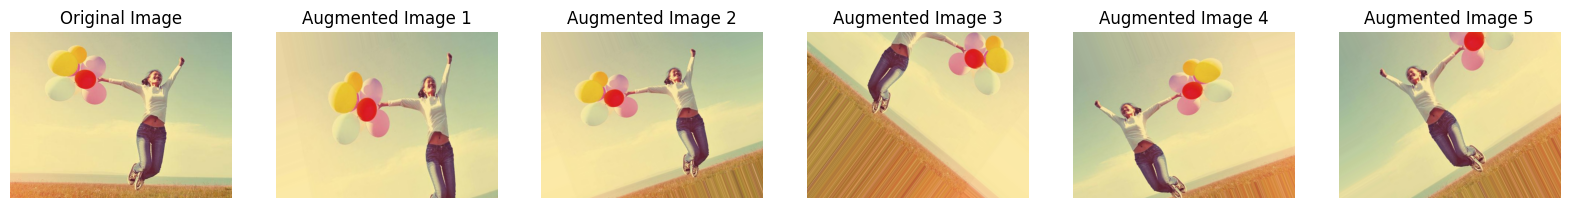

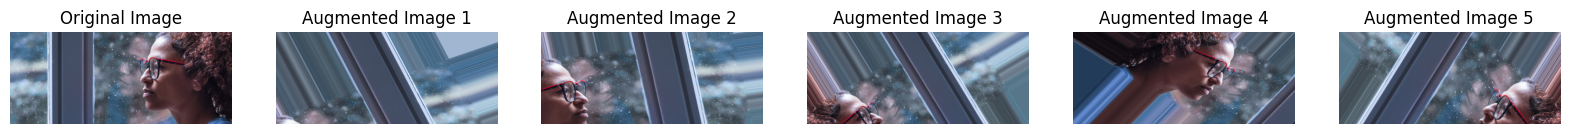

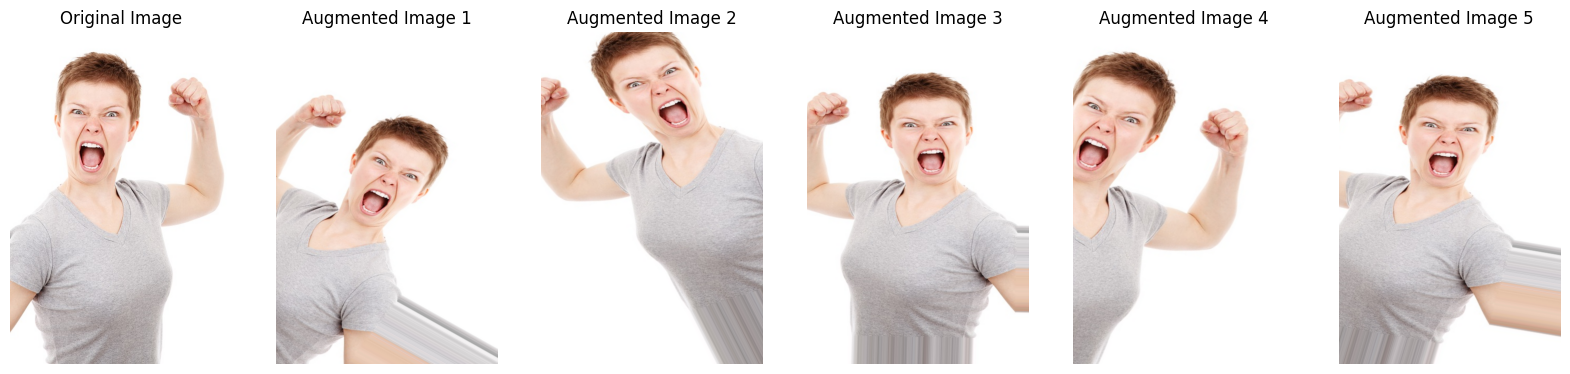

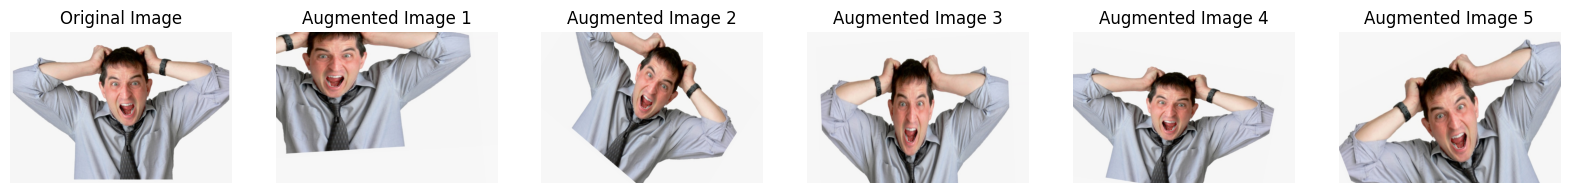

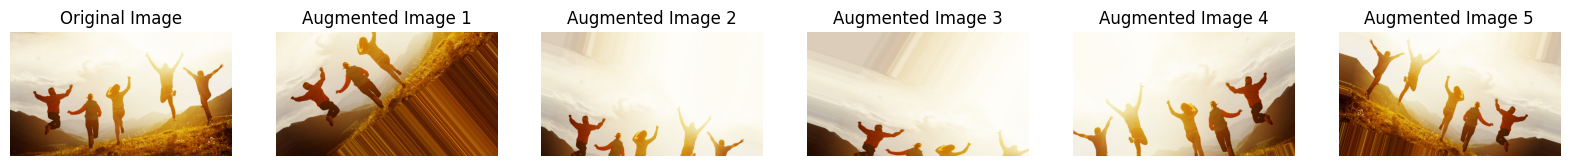

In [5]:
# Set a random seed for reproducibility
random.seed(21)

# Randomly select 5 images from the dataset
random_images = random.sample(image_files, 5)

# Visualize augmentations for each selected image
for image_path in random_images:
    visualize_augmentations(image_path, datagen)